In [37]:
# %run class_obj.ipynb
# %run system_initial.ipynb
# %run SINR_model.ipynb
# %run Input_setting.ipynb

C:\Users\HP\Anaconda3\envs\23GC\python.exe
3.6.13 |Anaconda, Inc.| (default, Mar 16 2021, 11:37:27) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=6, micro=13, releaselevel='final', serial=0)


In [54]:
# MECs, tasks, network_graph = Input_Setting(config)

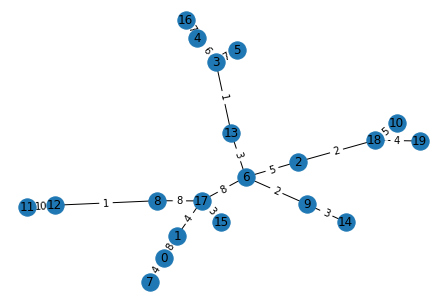

In [3]:
# draw_network_graph(network_graph)

In [4]:
# for m in range(len(MECs)):
#     print(MECs[m].stored_features)

In [5]:
def get_minimum_forwarding_cost(network_graph , MEC_server, MEC_stored_set):
    min_forwarding_cost = 5000
    for m in MEC_stored_set:
        cost = forwarding_cost(network_graph, MEC_server, m )
        if cost < min_forwarding_cost:
            min_forwarding_cost = cost
    return min_forwarding_cost

In [6]:
def forward_cost_calculate(set_of_selected_features, MECs, MEC_server, network_graph):
    '''
    Args:
    set_of_selected_features: set of selected features for tasks within MEC_server
    MECs: set of MEC server
    MEC_server: current MEC server
    '''
    not_in_mec = [i for i in set_of_selected_features if i not in list(MECs[MEC_server].stored_features)]
    total_forward_cost = 0
    for i in not_in_mec:  
        forward_feature_set = [] 
        for m in range(len(MECs)):
            if i in MECs[m].stored_features:
                forward_feature_set.append(m)
        cost = get_minimum_forwarding_cost(network_graph , MEC_server, forward_feature_set)

        total_forward_cost += cost
    return total_forward_cost

In [7]:
def cost_calculate_MEC(set_of_selected_features, MECs, MEC_server, network_graph, config):
    comp_unit = config['comp_unit']
    comm_unit = config['comm_unit']

    comp_cost = comp_unit *  len(set_of_selected_features)
    comm_cost = comm_unit *  len(set_of_selected_features)
    forward_cost = forward_cost_calculate(set_of_selected_features, MECs, MEC_server, network_graph)
    total_cost_MEC = comp_cost + comm_cost + forward_cost
    return total_cost_MEC, comp_cost, comm_cost+ forward_cost

In [11]:
def check_co_feature(tasks, t):
    '''
    t: current task
    '''
    for feature in tasks[t].co_feature:
        if feature in tasks[t].selected_features:
            tasks[t].selected_features.extend(tasks[t].co_feature)
            tasks[t].selected_features = list(set(tasks[t].selected_features))
            break
    return tasks[t].selected_features

In [ ]:
def calculate_shared_feature(tasks, config):
    '''
    To calculte that "each feature is shared with how much user?"
    '''
    total_counts = 0
    num_features = config['num_features']
    counts = {num: 0 for num in range(num_features)}
    for t in range(len(tasks)):
        for num in tasks[t].selected_features:
            counts[num] += 1

    total_counts = sum(counts.values())
    return total_counts  / num_features